# Pre-Processing Of ADNIMERGE & Plasma Dataset


In [1]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from adni_utils import *
from functools import reduce

In [2]:
adnimerge_df = df_of_csv("ADNIMERGE")
adnimerge_df

/home/alihasan/Documents/ThirdYearProject/ML-MCI-AD-Conversion/adni_utils.py:102: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{INPUT_DIR if input_dir else OUTPUT_DIR}/{filename}.csv")


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,2023-07-07 04:59:40.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,2023-07-07 04:59:40.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,2023-07-07 04:59:40.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,2023-07-07 04:59:40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16416,4349,ADNI3,ADNI2,018_S_4349,18,m138,2023-03-30,CN,71.4,Female,...,17.82,1.33353,NaN,1.0344,NaN,11.351100,135.93400,138,138,2023-08-22 04:58:56.0
16417,6801,ADNI3,ADNI3,041_S_6801,41,m42,2023-06-30,SMC,61.0,Female,...,NaN,NaN,NaN,1.1509,NaN,3.701570,44.32790,42,42,2023-08-25 05:00:03.0
16418,5097,ADNI3,ADNI2,041_S_5097,41,m126,2023-08-16,SMC,67.5,Male,...,16.48,1.20863,NaN,1.1086,NaN,10.371000,124.19700,126,126,2023-08-26 05:00:28.0
16419,6515,ADNI3,ADNI3,007_S_6515,7,m60,2023-08-24,SMC,89.9,Female,...,NaN,NaN,NaN,NaN,1.1475,5.004790,59.93440,60,60,2023-08-29 04:58:51.0


In [3]:
plasma_df = df_of_csv("PLASMA_DATA", input_dir=False)
plasma_df

,RID,VISCODE,PLASMA_NFL,PLASMA_PTAU,PLASMA_AB_42_40
0,2,bl,NaN,2.410,0.331165
1,2,m36,NaN,NaN,0.471653
2,2,m60,25.3,11.939,NaN
3,2,m72,30.9,12.936,NaN
4,2,m84,34.1,13.563,NaN
...,...,...,...,...,...
6329,5294,bl,21.2,7.085,NaN
6330,5295,bl,16.4,10.932,NaN
6331,5295,m24,14.1,9.335,NaN
6332,5296,bl,21.4,4.045,0.135155


In [4]:
# All the different values that are present in the dataset for diagnosis
print(f"DX_bl: \t{adnimerge_df['DX_bl'].unique()}")
print(f"DX: \t{adnimerge_df['DX'].unique()}")

DX_bl: 	['CN' 'AD' 'LMCI' 'SMC' 'EMCI' nan]
DX: 	['CN' 'Dementia' 'MCI' nan]


In [5]:
# Filter out all the records that don't have MCI as the baseline
# diagnosis as we aren't interested in this data for this study
baseline_mci_df = adnimerge_df[
    adnimerge_df["DX_bl"].str.contains("EMCI|LMCI", regex=True, case=False, na=False)
]
baseline_mci_df

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
5,4,ADNI1,ADNI1,022_S_0004,22,bl,2005-11-08,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,0.000000,0.0000,0,0,2023-07-07 04:59:40.0
6,4,ADNI1,ADNI1,022_S_0004,22,m06,2006-05-02,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,0.479124,5.7377,6,6,2023-07-07 04:59:40.0
7,4,ADNI1,ADNI1,022_S_0004,22,m12,2006-11-14,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,1.015740,12.1639,12,12,2023-07-07 04:59:40.0
8,4,ADNI1,ADNI1,022_S_0004,22,m18,2007-05-14,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,1.511290,18.0984,18,18,2023-07-07 04:59:40.0
9,4,ADNI1,ADNI1,022_S_0004,22,m36,2008-11-18,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,3.028060,36.2623,36,36,2023-07-07 04:59:40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16405,6446,ADNI3,ADNI3,135_S_6446,135,m60,2023-07-12,EMCI,61.5,Male,...,NaN,1.39779,NaN,NaN,0.9946,5.004790,59.9344,60,60,2023-08-18 05:00:32.0
16409,6731,ADNI3,ADNI3,041_S_6731,41,m48,2023-07-31,EMCI,66.8,Female,...,NaN,1.45969,NaN,1.3642,NaN,4.139630,49.5738,48,48,2023-08-18 05:00:33.0
16410,6480,ADNI3,ADNI3,035_S_6480,35,m60,2023-07-27,LMCI,79.9,Female,...,NaN,1.15370,NaN,1.5847,NaN,5.040380,60.3607,60,60,2023-08-09 05:00:00.0
16412,6757,ADNI3,ADNI3,019_S_6757,19,m48,2023-08-14,LMCI,71.4,Female,...,NaN,1.48434,NaN,NaN,1.2001,4.139630,49.5738,48,48,2023-08-24 05:00:12.0


In [6]:
# These are the essential columns we are concerned with as part of the modelling
columns = [
    "RID",
    "VISCODE",
    "DX_bl",
    "DX",
    "Years_bl",
    "AGE",
    "PTGENDER",
    "PTEDUCAT",
    "PTMARRY",
    "PTRACCAT",
    "APOE4",
    "ABETA_bl",
    "ABETA",
    "TAU_bl",
    "TAU",
    "PTAU_bl",
    "PTAU",
    "PLASMA_NFL_bl",
    "PLASMA_NFL",
    "PLASMA_PTAU_bl",
    "PLASMA_PTAU",
    "PLASMA_AB_42_40_bl",
    "PLASMA_AB_42_40",
    "MMSE_bl",
    "MMSE",
    "RAVLT_immediate_bl",
    "RAVLT_immediate",
    "RAVLT_learning_bl",
    "RAVLT_learning",
    "RAVLT_forgetting_bl",
    "RAVLT_forgetting",
    "RAVLT_perc_forgetting_bl",
    "RAVLT_perc_forgetting",
    "ADAS11_bl",
    "ADAS11",
    "ADAS13_bl",
    "ADAS13",
    "ADASQ4_bl",
    "ADASQ4",
    "mPACCdigit_bl",
    "mPACCdigit",
    "mPACCtrailsB_bl",
    "mPACCtrailsB",
    "FAQ_bl",
    "FAQ",
]

# Merge the ADNIMERGE dataset with the plasma dataset on RID and VISCODE
df = baseline_mci_df.merge(plasma_df, on=["RID", "VISCODE"], how="left").sort_values(
    by=["RID", "Years_bl"]
)

# Add a bl column for each of the plasma columns into the merged dataset
columns_to_process = ["PLASMA_NFL", "PLASMA_PTAU", "PLASMA_AB_42_40"]
df = reduce(create_bl_of_col, columns_to_process, df)[columns]

pd.set_option("display.max_columns", None)
df

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
0,4,bl,LMCI,MCI,0.000000,67.5,Male,10,Married,White,0.0,1501.0,1501.0,153.1,153.1,13.29,13.29,NaN,NaN,3.76,3.76,0.311458,0.311458,27.0,27.0,37.0,37.0,7.0,7.0,4.0,4.0,36.3636,36.3636,14.33,14.33,21.33,21.33,6.0,6.0,-8.421500,-8.421500,-9.449350,-9.449350,0.0,0.0
1,4,m06,LMCI,MCI,0.479124,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,28.0,37.0,33.0,7.0,7.0,4.0,1.0,36.3636,11.1111,14.33,17.33,21.33,25.33,6.0,7.0,-8.421500,-7.232670,-9.449350,-6.394750,0.0,0.0
2,4,m12,LMCI,MCI,1.015740,67.5,Male,10,Married,White,0.0,1501.0,1176.0,153.1,159.7,13.29,13.3,NaN,NaN,3.76,NaN,0.311458,0.289498,27.0,26.0,37.0,37.0,7.0,4.0,4.0,1.0,36.3636,12.5000,14.33,15.00,21.33,22.00,6.0,7.0,-8.421500,-9.061240,-9.449350,-10.289100,0.0,0.0
3,4,m18,LMCI,MCI,1.511290,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,27.0,37.0,44.0,7.0,8.0,4.0,2.0,36.3636,16.6667,14.33,20.33,21.33,28.33,6.0,7.0,-8.421500,-7.873660,-9.449350,-7.625370,0.0,1.0
4,4,m30,LMCI,NaN,2.496920,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,NaN,37.0,NaN,7.0,NaN,4.0,NaN,36.3636,NaN,14.33,NaN,21.33,NaN,6.0,NaN,-8.421500,NaN,-9.449350,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,7088,bl,LMCI,MCI,0.000000,70.0,Male,16,Married,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,27.0,24.0,24.0,5.0,5.0,5.0,5.0,71.4286,71.4286,15.67,15.67,24.67,24.67,7.0,7.0,-9.659400,-9.659400,-9.248820,-9.248820,3.0,3.0
8266,7088,m12,LMCI,Dementia,0.988364,70.0,Male,16,Married,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,25.0,24.0,24.0,5.0,2.0,5.0,6.0,71.4286,100.0000,15.67,16.67,24.67,25.67,7.0,7.0,-9.659400,-13.186500,-9.248820,-10.737000,3.0,6.0
8267,7105,bl,LMCI,MCI,0.000000,77.5,Male,18,Married,More than one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,24.0,26.0,26.0,2.0,2.0,6.0,6.0,100.0000,100.0000,12.00,12.00,22.00,22.00,7.0,7.0,-14.350300,-14.350300,-13.554000,-13.554000,0.0,0.0
8268,7117,bl,EMCI,MCI,0.000000,68.9,Female,18,Never married,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30.0,45.0,45.0,8.0,8.0,5.0,5.0,38.4615,38.4615,5.00,5.00,7.00,7.00,2.0,2.0,2.742450,2.742450,2.540260,2.540260,0.0,0.0


In [7]:
# As we can see in the record for RID 4, DX is NaN for one of the columns
df[df["RID"] == 4]

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
0,4,bl,LMCI,MCI,0.000000,67.5,Male,10,Married,White,0.0,1501.0,1501.0,153.1,153.1,13.29,13.29,NaN,NaN,3.76,3.76,0.311458,0.311458,27.0,27.0,37.0,37.0,7.0,7.0,4.0,4.0,36.3636,36.3636,14.33,14.33,21.33,21.33,6.0,6.0,-8.4215,-8.42150,-9.44935,-9.44935,0.0,0.0
1,4,m06,LMCI,MCI,0.479124,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,28.0,37.0,33.0,7.0,7.0,4.0,1.0,36.3636,11.1111,14.33,17.33,21.33,25.33,6.0,7.0,-8.4215,-7.23267,-9.44935,-6.39475,0.0,0.0
2,4,m12,LMCI,MCI,1.015740,67.5,Male,10,Married,White,0.0,1501.0,1176.0,153.1,159.7,13.29,13.3,NaN,NaN,3.76,NaN,0.311458,0.289498,27.0,26.0,37.0,37.0,7.0,4.0,4.0,1.0,36.3636,12.5000,14.33,15.00,21.33,22.00,6.0,7.0,-8.4215,-9.06124,-9.44935,-10.28910,0.0,0.0
3,4,m18,LMCI,MCI,1.511290,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,27.0,37.0,44.0,7.0,8.0,4.0,2.0,36.3636,16.6667,14.33,20.33,21.33,28.33,6.0,7.0,-8.4215,-7.87366,-9.44935,-7.62537,0.0,1.0
4,4,m30,LMCI,NaN,2.496920,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,NaN,37.0,NaN,7.0,NaN,4.0,NaN,36.3636,NaN,14.33,NaN,21.33,NaN,6.0,NaN,-8.4215,NaN,-9.44935,NaN,0.0,NaN
5,4,m36,LMCI,MCI,3.028060,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,25.0,37.0,44.0,7.0,7.0,4.0,2.0,36.3636,18.1818,14.33,18.00,21.33,25.00,6.0,7.0,-8.4215,-10.63190,-9.44935,-11.66010,0.0,0.0


In [8]:
# Replace NaN for DX with an actual value, if the value
# of DX for the above and below rows are the same
df = replace_nan_with_surrounding_matching_val(df, "DX")

# Remove any rows from the dataset that still have NaN in their diagnosis
# since we can't determine what they were diagnosed with in that visit
df = df.dropna(subset="DX")

df[df["RID"] == 4]

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
0,4,bl,LMCI,MCI,0.000000,67.5,Male,10,Married,White,0.0,1501.0,1501.0,153.1,153.1,13.29,13.29,NaN,NaN,3.76,3.76,0.311458,0.311458,27.0,27.0,37.0,37.0,7.0,7.0,4.0,4.0,36.3636,36.3636,14.33,14.33,21.33,21.33,6.0,6.0,-8.4215,-8.42150,-9.44935,-9.44935,0.0,0.0
1,4,m06,LMCI,MCI,0.479124,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,28.0,37.0,33.0,7.0,7.0,4.0,1.0,36.3636,11.1111,14.33,17.33,21.33,25.33,6.0,7.0,-8.4215,-7.23267,-9.44935,-6.39475,0.0,0.0
2,4,m12,LMCI,MCI,1.015740,67.5,Male,10,Married,White,0.0,1501.0,1176.0,153.1,159.7,13.29,13.3,NaN,NaN,3.76,NaN,0.311458,0.289498,27.0,26.0,37.0,37.0,7.0,4.0,4.0,1.0,36.3636,12.5000,14.33,15.00,21.33,22.00,6.0,7.0,-8.4215,-9.06124,-9.44935,-10.28910,0.0,0.0
3,4,m18,LMCI,MCI,1.511290,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,27.0,37.0,44.0,7.0,8.0,4.0,2.0,36.3636,16.6667,14.33,20.33,21.33,28.33,6.0,7.0,-8.4215,-7.87366,-9.44935,-7.62537,0.0,1.0
4,4,m30,LMCI,MCI,2.496920,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,NaN,37.0,NaN,7.0,NaN,4.0,NaN,36.3636,NaN,14.33,NaN,21.33,NaN,6.0,NaN,-8.4215,NaN,-9.44935,NaN,0.0,NaN
5,4,m36,LMCI,MCI,3.028060,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,25.0,37.0,44.0,7.0,7.0,4.0,2.0,36.3636,18.1818,14.33,18.00,21.33,25.00,6.0,7.0,-8.4215,-10.63190,-9.44935,-11.66010,0.0,0.0


In [9]:
# An example record of the plasma data merged into the ADNIMERGE dataset
# Some of the values in the table are non-numerical like ABETA_bl (>1700)
df[df["RID"] == 2018]

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
3668,2018,bl,EMCI,MCI,0.000000,76.4,Female,18,Married,White,0.0,>1700,>1700,223.1,223.1,17.92,17.92,36.3,36.3,10.252,10.252,0.135257,0.135257,29.0,29.0,46.0,46.0,9.0,9.0,1.0,1.0,7.69231,7.69231,7.0,7.00,10.0,10.00,2.0,2.0,-1.22015,-1.220150,-1.15975,-1.159750,0.0,0.0
3669,2018,m03,EMCI,MCI,0.180698,76.4,Female,18,Married,White,0.0,>1700,NaN,223.1,NaN,17.92,NaN,36.3,NaN,10.252,NaN,0.135257,NaN,29.0,NaN,46.0,NaN,9.0,NaN,1.0,NaN,7.69231,NaN,7.0,NaN,10.0,NaN,2.0,NaN,-1.22015,NaN,-1.15975,NaN,0.0,NaN
3670,2018,m06,EMCI,MCI,0.536619,76.4,Female,18,Married,White,0.0,>1700,NaN,223.1,NaN,17.92,NaN,36.3,NaN,10.252,NaN,0.135257,NaN,29.0,29.0,46.0,44.0,9.0,8.0,1.0,3.0,7.69231,25.00000,7.0,2.00,10.0,3.00,2.0,0.0,-1.22015,2.956820,-1.15975,0.531643,0.0,4.0
3671,2018,m12,EMCI,MCI,0.939083,76.4,Female,18,Married,White,0.0,>1700,NaN,223.1,NaN,17.92,NaN,36.3,35.7,10.252,12.988,0.135257,NaN,29.0,29.0,46.0,48.0,9.0,9.0,1.0,2.0,7.69231,15.38460,7.0,6.00,10.0,7.00,2.0,0.0,-1.22015,1.464410,-1.15975,-0.836469,0.0,0.0
3672,2018,m18,EMCI,MCI,1.448320,76.4,Female,18,Married,White,0.0,>1700,NaN,223.1,NaN,17.92,NaN,36.3,NaN,10.252,NaN,0.135257,NaN,29.0,NaN,46.0,NaN,9.0,NaN,1.0,NaN,7.69231,NaN,7.0,NaN,10.0,NaN,2.0,NaN,-1.22015,NaN,-1.15975,NaN,0.0,NaN
3673,2018,m24,EMCI,MCI,1.902810,76.4,Female,18,Married,White,0.0,>1700,>1700,223.1,223.2,17.92,17.99,36.3,33.6,10.252,10.785,0.135257,NaN,29.0,30.0,46.0,46.0,9.0,8.0,1.0,-1.0,7.69231,-8.33333,7.0,11.00,10.0,13.00,2.0,2.0,-1.22015,0.743299,-1.15975,-0.267367,0.0,7.0
3675,2018,m36,EMCI,CN,2.956880,76.4,Female,18,Married,White,0.0,>1700,NaN,223.1,NaN,17.92,NaN,36.3,38.9,10.252,14.320,0.135257,NaN,29.0,30.0,46.0,55.0,9.0,9.0,1.0,1.0,7.69231,7.14286,7.0,5.00,10.0,7.00,2.0,2.0,-1.22015,1.143130,-1.15975,-0.629020,0.0,0.0
3676,2018,m48,EMCI,CN,4.665300,76.4,Female,18,Married,White,0.0,>1700,NaN,223.1,NaN,17.92,NaN,36.3,NaN,10.252,NaN,0.135257,NaN,29.0,NaN,46.0,NaN,9.0,NaN,1.0,NaN,7.69231,NaN,7.0,NaN,10.0,NaN,2.0,NaN,-1.22015,NaN,-1.15975,NaN,0.0,0.0
3677,2018,m102,EMCI,CN,8.377820,76.4,Female,18,Married,White,0.0,>1700,NaN,223.1,NaN,17.92,NaN,36.3,NaN,10.252,NaN,0.135257,NaN,29.0,30.0,46.0,38.0,9.0,9.0,1.0,2.0,7.69231,16.66670,7.0,8.33,10.0,11.33,2.0,2.0,-1.22015,1.542960,-1.15975,-0.001717,0.0,0.0


In [10]:
# Get all the columns with mixed data types so we can format the data up for them
mixed_types = df.columns[df.apply(lambda col: col.map(type).nunique() > 1)]

# Find the exact non-numerical values and the corresponding column
print("These are the following strings to change to numerical values -")
for column in mixed_types:
    column_data_as_list = df[column].unique().tolist()
    filtered = filter(remove_float_values, column_data_as_list)
    print(f"{column}:", list(filtered))

These are the following strings to change to numerical values -
PTMARRY: ['Married', 'Never married', 'Divorced', 'Widowed', 'Unknown']
ABETA_bl: ['>1700']
ABETA: ['>1700']
TAU_bl: ['>1300']
TAU: ['>1300']
PTAU_bl: ['>120']
PTAU: ['>120', '<8']


In [11]:
# Define a replacement map that replaces the strings with a numerical
# value for some of the fields that have mixed types in their columns
replacement_map = {
    "ABETA": {">1700": 1701},
    "TAU": {">1300": 1301},
    "PTAU": {">120": 121, "<8": 7},
    "ABETA_bl": {">1700": 1701},
    "TAU_bl": {">1300": 1301},
    "PTAU_bl": {">120": 121},
}

df = df.replace(replacement_map)

In [12]:
# Check the conversion from strings to numerical values has worked as expected
df[df["RID"] == 2018]

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
3668,2018,bl,EMCI,MCI,0.000000,76.4,Female,18,Married,White,0.0,1701,1701,223.1,223.1,17.92,17.92,36.3,36.3,10.252,10.252,0.135257,0.135257,29.0,29.0,46.0,46.0,9.0,9.0,1.0,1.0,7.69231,7.69231,7.0,7.00,10.0,10.00,2.0,2.0,-1.22015,-1.220150,-1.15975,-1.159750,0.0,0.0
3669,2018,m03,EMCI,MCI,0.180698,76.4,Female,18,Married,White,0.0,1701,NaN,223.1,NaN,17.92,NaN,36.3,NaN,10.252,NaN,0.135257,NaN,29.0,NaN,46.0,NaN,9.0,NaN,1.0,NaN,7.69231,NaN,7.0,NaN,10.0,NaN,2.0,NaN,-1.22015,NaN,-1.15975,NaN,0.0,NaN
3670,2018,m06,EMCI,MCI,0.536619,76.4,Female,18,Married,White,0.0,1701,NaN,223.1,NaN,17.92,NaN,36.3,NaN,10.252,NaN,0.135257,NaN,29.0,29.0,46.0,44.0,9.0,8.0,1.0,3.0,7.69231,25.00000,7.0,2.00,10.0,3.00,2.0,0.0,-1.22015,2.956820,-1.15975,0.531643,0.0,4.0
3671,2018,m12,EMCI,MCI,0.939083,76.4,Female,18,Married,White,0.0,1701,NaN,223.1,NaN,17.92,NaN,36.3,35.7,10.252,12.988,0.135257,NaN,29.0,29.0,46.0,48.0,9.0,9.0,1.0,2.0,7.69231,15.38460,7.0,6.00,10.0,7.00,2.0,0.0,-1.22015,1.464410,-1.15975,-0.836469,0.0,0.0
3672,2018,m18,EMCI,MCI,1.448320,76.4,Female,18,Married,White,0.0,1701,NaN,223.1,NaN,17.92,NaN,36.3,NaN,10.252,NaN,0.135257,NaN,29.0,NaN,46.0,NaN,9.0,NaN,1.0,NaN,7.69231,NaN,7.0,NaN,10.0,NaN,2.0,NaN,-1.22015,NaN,-1.15975,NaN,0.0,NaN
3673,2018,m24,EMCI,MCI,1.902810,76.4,Female,18,Married,White,0.0,1701,1701,223.1,223.2,17.92,17.99,36.3,33.6,10.252,10.785,0.135257,NaN,29.0,30.0,46.0,46.0,9.0,8.0,1.0,-1.0,7.69231,-8.33333,7.0,11.00,10.0,13.00,2.0,2.0,-1.22015,0.743299,-1.15975,-0.267367,0.0,7.0
3675,2018,m36,EMCI,CN,2.956880,76.4,Female,18,Married,White,0.0,1701,NaN,223.1,NaN,17.92,NaN,36.3,38.9,10.252,14.320,0.135257,NaN,29.0,30.0,46.0,55.0,9.0,9.0,1.0,1.0,7.69231,7.14286,7.0,5.00,10.0,7.00,2.0,2.0,-1.22015,1.143130,-1.15975,-0.629020,0.0,0.0
3676,2018,m48,EMCI,CN,4.665300,76.4,Female,18,Married,White,0.0,1701,NaN,223.1,NaN,17.92,NaN,36.3,NaN,10.252,NaN,0.135257,NaN,29.0,NaN,46.0,NaN,9.0,NaN,1.0,NaN,7.69231,NaN,7.0,NaN,10.0,NaN,2.0,NaN,-1.22015,NaN,-1.15975,NaN,0.0,0.0
3677,2018,m102,EMCI,CN,8.377820,76.4,Female,18,Married,White,0.0,1701,NaN,223.1,NaN,17.92,NaN,36.3,NaN,10.252,NaN,0.135257,NaN,29.0,30.0,46.0,38.0,9.0,9.0,1.0,2.0,7.69231,16.66670,7.0,8.33,10.0,11.33,2.0,2.0,-1.22015,1.542960,-1.15975,-0.001717,0.0,0.0


In [13]:
# Filtered df with those who begin with MCI and remain
# in MCI for the duration of the study (non-converters)
remain_mci = df[df["DX"].str.contains("MCI", regex=True, case=False, na=False)]
remain_mci

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
0,4,bl,LMCI,MCI,0.000000,67.5,Male,10,Married,White,0.0,1501.0,1501.0,153.1,153.1,13.29,13.29,NaN,NaN,3.76,3.76,0.311458,0.311458,27.0,27.0,37.0,37.0,7.0,7.0,4.0,4.0,36.3636,36.3636,14.33,14.33,21.33,21.33,6.0,6.0,-8.421500,-8.421500,-9.449350,-9.449350,0.0,0.0
1,4,m06,LMCI,MCI,0.479124,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,28.0,37.0,33.0,7.0,7.0,4.0,1.0,36.3636,11.1111,14.33,17.33,21.33,25.33,6.0,7.0,-8.421500,-7.232670,-9.449350,-6.394750,0.0,0.0
2,4,m12,LMCI,MCI,1.015740,67.5,Male,10,Married,White,0.0,1501.0,1176.0,153.1,159.7,13.29,13.3,NaN,NaN,3.76,NaN,0.311458,0.289498,27.0,26.0,37.0,37.0,7.0,4.0,4.0,1.0,36.3636,12.5000,14.33,15.00,21.33,22.00,6.0,7.0,-8.421500,-9.061240,-9.449350,-10.289100,0.0,0.0
3,4,m18,LMCI,MCI,1.511290,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,27.0,37.0,44.0,7.0,8.0,4.0,2.0,36.3636,16.6667,14.33,20.33,21.33,28.33,6.0,7.0,-8.421500,-7.873660,-9.449350,-7.625370,0.0,1.0
4,4,m30,LMCI,MCI,2.496920,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,NaN,37.0,NaN,7.0,NaN,4.0,NaN,36.3636,NaN,14.33,NaN,21.33,NaN,6.0,NaN,-8.421500,NaN,-9.449350,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,7086,bl,LMCI,MCI,0.000000,61.4,Male,12,Married,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,28.0,22.0,22.0,4.0,4.0,6.0,6.0,85.7143,85.7143,20.33,20.33,31.33,31.33,9.0,9.0,-10.780300,-10.780300,-11.308700,-11.308700,15.0,15.0
8265,7088,bl,LMCI,MCI,0.000000,70.0,Male,16,Married,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,27.0,24.0,24.0,5.0,5.0,5.0,5.0,71.4286,71.4286,15.67,15.67,24.67,24.67,7.0,7.0,-9.659400,-9.659400,-9.248820,-9.248820,3.0,3.0
8267,7105,bl,LMCI,MCI,0.000000,77.5,Male,18,Married,More than one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,24.0,26.0,26.0,2.0,2.0,6.0,6.0,100.0000,100.0000,12.00,12.00,22.00,22.00,7.0,7.0,-14.350300,-14.350300,-13.554000,-13.554000,0.0,0.0
8268,7117,bl,EMCI,MCI,0.000000,68.9,Female,18,Never married,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30.0,45.0,45.0,8.0,8.0,5.0,5.0,38.4615,38.4615,5.00,5.00,7.00,7.00,2.0,2.0,2.742450,2.742450,2.540260,2.540260,0.0,0.0


In [14]:
# Get only the first record for each of non-converter that is 2 years after bl
remain_mci_two_years = filter_n_years_from_bl(remain_mci, 2)
remain_mci_two_years

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
4,4,m30,LMCI,MCI,2.49692,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,NaN,37.0,NaN,7.0,NaN,4.0,NaN,36.3636,NaN,14.33,NaN,21.33,NaN,6.0,NaN,-8.421500,NaN,-9.449350,NaN,0.0,NaN
11,6,m30,LMCI,MCI,2.53525,80.4,Female,13,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.86,NaN,0.153287,NaN,25.0,NaN,30.0,NaN,1.0,NaN,5.0,NaN,83.3333,NaN,18.67,NaN,25.67,NaN,7.0,NaN,-10.141700,NaN,-10.910900,NaN,0.0,NaN
25,33,m36,LMCI,MCI,3.08556,83.3,Male,20,Married,White,0.0,673.0,NaN,333.7,NaN,34.93,NaN,NaN,NaN,2.48,NaN,0.209970,0.242356,29.0,25.0,21.0,11.0,4.0,1.0,6.0,3.0,100.0000,100.0000,17.67,22.00,25.67,32.00,6.0,10.0,-6.404910,-11.731800,-7.788770,-14.199100,6.0,5.0
72,51,m24,LMCI,MCI,2.00684,66.5,Male,18,Married,White,2.0,352.5,NaN,285.1,NaN,28.4,NaN,NaN,NaN,1.94,NaN,0.185836,0.146944,27.0,28.0,29.0,25.0,1.0,2.0,4.0,5.0,57.1429,83.3333,9.67,7.33,17.67,16.33,7.0,8.0,-5.628120,-6.811550,-6.584720,-7.136620,2.0,8.0
114,80,m24,LMCI,MCI,2.00958,85.0,Male,18,Married,White,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,NaN,0.251608,0.209650,27.0,25.0,23.0,23.0,4.0,1.0,3.0,4.0,42.8571,100.0000,14.00,15.00,21.00,23.00,7.0,7.0,-7.623410,-9.865020,-8.031160,-9.987360,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8140,6816,m24,EMCI,MCI,2.11636,75.0,Female,16,Married,White,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,28.0,37.0,44.0,8.0,8.0,2.0,4.0,20.0000,30.7692,7.33,5.67,12.33,7.67,5.0,2.0,0.950374,0.414873,1.527410,-0.886451,0.0,2.0
8148,6830,m36,LMCI,MCI,3.02259,90.0,Male,16,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,22.0,34.0,26.0,6.0,3.0,4.0,7.0,40.0000,100.0000,7.33,19.00,12.33,26.00,5.0,6.0,-4.247420,-14.735800,-4.363920,-13.721700,1.0,2.0
8153,6842,m24,EMCI,MCI,2.03696,72.2,Female,18,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,29.0,42.0,48.0,7.0,9.0,2.0,3.0,18.1818,21.4286,4.67,5.67,6.67,8.67,1.0,1.0,1.921370,2.321200,1.225100,1.201240,2.0,2.0
8160,6846,m30,EMCI,MCI,2.31622,77.1,Male,18,Married,White,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,27.0,22.0,23.0,6.0,1.0,4.0,5.0,50.0000,100.0000,5.33,13.00,9.33,19.00,4.0,5.0,-1.541440,-6.575000,-0.204415,-4.328920,0.0,1.0


In [15]:
# Filtered df with those who begin with MCI and convert to AD during the study
convert_ad = df[df["DX"].str.contains("Dementia", regex=True, case=False, na=False)]
convert_ad

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
14,30,m06,LMCI,Dementia,0.479124,80.0,Female,19,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.53,NaN,0.22904,NaN,29.0,24.0,36.0,22.0,6.0,2.0,10.0,6.0,90.9091,100.0,10.00,13.00,22.00,22.00,10.0,8.0,-8.32106,-10.9312,-8.638880,-10.79690,6.0,5.0
15,30,m12,LMCI,Dementia,0.977413,80.0,Female,19,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.53,NaN,0.22904,0.219448,29.0,19.0,36.0,26.0,6.0,4.0,10.0,7.0,90.9091,100.0,10.00,17.00,22.00,26.00,10.0,8.0,-8.32106,-16.2471,-8.638880,-16.63940,6.0,14.0
16,30,m18,LMCI,Dementia,1.514030,80.0,Female,19,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.53,NaN,0.22904,NaN,29.0,23.0,36.0,20.0,6.0,2.0,10.0,5.0,90.9091,100.0,10.00,18.33,22.00,28.33,10.0,9.0,-8.32106,-13.0990,-8.638880,-13.21350,6.0,11.0
17,30,m24,LMCI,Dementia,2.064340,80.0,Female,19,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.53,NaN,0.22904,0.193841,29.0,22.0,36.0,24.0,6.0,2.0,10.0,6.0,90.9091,100.0,10.00,18.67,22.00,29.67,10.0,10.0,-8.32106,-15.2325,-8.638880,-15.79780,6.0,15.0
18,30,m30,LMCI,Dementia,2.584530,80.0,Female,19,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.53,NaN,0.22904,NaN,29.0,NaN,36.0,NaN,6.0,NaN,10.0,NaN,90.9091,NaN,10.00,NaN,22.00,NaN,10.0,NaN,-8.32106,NaN,-8.638880,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8134,6805,m36,EMCI,Dementia,3.197810,61.9,Female,16,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,23.0,58.0,29.0,4.0,3.0,2.0,6.0,18.1818,75.0,5.67,NaN,10.67,NaN,3.0,10.0,1.63579,-14.1432,0.147164,-14.14320,11.0,24.0
8167,6852,m24,EMCI,Dementia,1.990420,76.4,Male,18,Married,Black,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,28.0,24.0,25.0,1.0,0.0,6.0,5.0,100.0000,100.0,9.00,15.33,21.00,22.33,7.0,5.0,-7.26041,-6.6107,-7.234750,-7.52181,0.0,2.0
8208,6908,m30,EMCI,Dementia,2.266940,89.1,Female,20,Divorced,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,22.0,31.0,21.0,4.0,1.0,9.0,4.0,100.0000,100.0,14.67,13.33,22.67,23.33,8.0,7.0,-10.33050,-11.8799,-10.499400,-10.02950,17.0,13.0
8210,6911,m12,LMCI,Dementia,1.141680,73.4,Male,18,Married,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,15.0,7.0,NaN,0.0,NaN,1.0,NaN,50.0000,NaN,19.33,46.00,31.33,58.00,10.0,9.0,-13.01510,-25.9096,-11.765600,-25.90960,6.0,24.0


In [16]:
# Filter the converters df, getting the records for those who convert within
# 2 years from the baseline visit, keeping the most recent record for each RID
convert_ad_df = convert_ad[convert_ad["Years_bl"] <= 2].drop_duplicates(
    subset="RID", keep="last"
)
convert_ad_df

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
16,30,m18,LMCI,Dementia,1.514030,80.0,Female,19,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.53,NaN,0.229040,NaN,29.0,23.0,36.0,20.0,6.0,2.0,10.0,5.0,90.9091,100.0000,10.00,18.33,22.00,28.33,10.0,9.0,-8.32106,-13.099000,-8.638880,-13.21350,6.0,11.0
33,41,m24,LMCI,Dementia,1.979470,70.9,Female,14,Married,White,2.0,414.6,NaN,221.3,NaN,18.07,NaN,NaN,NaN,2.77,NaN,0.177470,0.192536,25.0,24.0,22.0,21.0,-1.0,1.0,4.0,5.0,100.0000,100.0000,18.33,18.00,28.33,30.00,10.0,10.0,-9.95572,-11.803000,-12.530700,-11.72060,4.0,9.0
40,42,m18,LMCI,Dementia,1.494870,72.8,Male,18,Married,White,0.0,1258.0,NaN,250.1,NaN,18.23,NaN,NaN,NaN,2.57,NaN,0.128563,NaN,30.0,21.0,29.0,28.0,6.0,0.0,8.0,5.0,88.8889,100.0000,7.00,11.67,12.00,20.67,5.0,9.0,-3.98911,-13.858100,-4.822070,-14.07000,2.0,3.0
60,45,m12,LMCI,Dementia,1.149900,85.9,Male,18,Never married,White,1.0,383.3,373.3,526.0,578.8,58.65,61.47,NaN,NaN,3.48,NaN,0.243808,0.237992,29.0,22.0,24.0,9.0,1.0,-5.0,5.0,0.0,100.0000,NaN,15.33,17.33,23.33,27.33,7.0,10.0,-6.66194,-15.428600,-8.157070,-16.55100,1.0,2.0
64,50,m18,LMCI,Dementia,1.546890,77.6,Male,16,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.41,NaN,0.283615,NaN,26.0,20.0,30.0,29.0,3.0,1.0,6.0,5.0,75.0000,83.3333,18.00,24.33,29.00,37.33,6.0,9.0,-10.97820,-20.250000,-11.464700,-19.59170,13.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8128,6800,m18,LMCI,Dementia,1.494870,87.5,Female,19,Widowed,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,19.0,30.0,10.0,1.0,2.0,6.0,2.0,100.0000,100.0000,12.67,31.00,22.67,42.00,8.0,8.0,-6.87486,-20.112100,-7.254450,-18.38850,16.0,28.0
8133,6805,m24,EMCI,Dementia,1.952090,61.9,Female,16,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,28.0,58.0,45.0,4.0,1.0,2.0,0.0,18.1818,0.0000,5.67,7.67,10.67,15.67,3.0,3.0,1.63579,-0.727494,0.147164,-3.85008,11.0,21.0
8167,6852,m24,EMCI,Dementia,1.990420,76.4,Male,18,Married,Black,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,28.0,24.0,25.0,1.0,0.0,6.0,5.0,100.0000,100.0000,9.00,15.33,21.00,22.33,7.0,5.0,-7.26041,-6.610700,-7.234750,-7.52181,0.0,2.0
8210,6911,m12,LMCI,Dementia,1.141680,73.4,Male,18,Married,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,15.0,7.0,NaN,0.0,NaN,1.0,NaN,50.0000,NaN,19.33,46.00,31.33,58.00,10.0,9.0,-13.01510,-25.909600,-11.765600,-25.90960,6.0,24.0


In [17]:
# Get RIDs of all those who converted within 2 years to exclude from the next df
convert_ad_within_two_years_rid = convert_ad_df["RID"].unique()

# Remove the data for all those RIDs who converted within 2 years from bl
filtered_convert_ad_df = convert_ad[
    (~convert_ad["RID"].isin(convert_ad_within_two_years_rid))
]

# Get those who converted 2 years after their bl visit, these will be non-
# converters for our study as they converted after the set 2 year threshold
convert_ad_after_two_years = filter_n_years_from_bl(filtered_convert_ad_df, 2)

# Replace those who converted after 2 years
# diagnosis from Dementia to MCI for consistency
convert_ad_after_two_years["DX"] = convert_ad_after_two_years["DX"].replace(
    "Dementia", "MCI"
)

convert_ad_after_two_years

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
75,51,m72,LMCI,MCI,5.66461,66.5,Male,18,Married,White,2.0,352.5,356.9,285.1,282.1,28.4,27.77,NaN,63.7,1.94,24.041,0.185836,NaN,27.0,23.0,29.0,19.0,1.0,4.0,4.0,5.0,57.14290,100.0000,9.67,9.00,17.67,20.00,7.0,10.0,-5.628120,-16.54220,-6.58472,-12.70770,2.0,19.0
117,80,m48,LMCI,MCI,4.39973,85.0,Male,18,Married,White,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,NaN,0.251608,NaN,27.0,25.0,23.0,20.0,4.0,3.0,3.0,5.0,42.85710,100.0000,14.00,16.33,21.00,26.33,7.0,10.0,-7.623410,-11.82980,-8.03116,-11.86160,1.0,10.0
127,98,m36,LMCI,MCI,3.01164,84.4,Female,16,Divorced,White,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153821,0.146435,26.0,23.0,25.0,NaN,4.0,NaN,5.0,NaN,55.55560,NaN,10.67,22.00,17.67,31.00,6.0,8.0,-7.120380,-11.84460,-8.26740,-14.25740,4.0,14.0
197,112,m120,LMCI,MCI,10.00960,70.6,Male,18,Married,White,1.0,498.6,NaN,235.6,NaN,24.43,NaN,NaN,NaN,2.20,NaN,0.224777,NaN,30.0,25.0,50.0,34.0,9.0,1.0,1.0,7.0,7.14286,100.0000,6.00,13.00,9.00,21.00,2.0,6.0,-0.317317,-11.24440,0.21989,-9.18999,0.0,19.0
223,126,m36,LMCI,MCI,3.04175,77.5,Female,14,Divorced,White,1.0,536.8,NaN,256.3,NaN,24.94,NaN,NaN,NaN,2.51,NaN,0.257609,0.243088,25.0,22.0,35.0,27.0,3.0,4.0,7.0,8.0,87.50000,100.0000,9.67,13.33,14.67,22.33,5.0,9.0,-8.849240,-14.38160,-8.58358,-15.91040,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,6640,m30,LMCI,MCI,2.31622,83.1,Male,20,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,20.0,24.0,5.0,2.0,0.0,6.0,1.0,100.00000,100.0000,13.67,27.67,19.67,39.67,6.0,10.0,-8.916860,-21.23300,-7.99765,-17.51100,8.0,26.0
8073,6731,m48,EMCI,MCI,4.13963,66.8,Female,20,Married,White,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,29.0,47.0,29.0,6.0,0.0,7.0,5.0,58.33330,100.0000,4.33,11.33,11.33,19.33,7.0,8.0,-6.860580,-7.67452,-5.27310,-5.19386,1.0,7.0
8084,6755,m36,EMCI,MCI,2.99795,68.3,Male,15,Married,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,18.0,36.0,24.0,5.0,1.0,NaN,4.0,NaN,80.0000,6.67,23.00,10.67,33.00,4.0,8.0,-2.705220,-20.87600,-2.56858,-20.87600,14.0,29.0
8118,6788,m30,LMCI,MCI,2.28063,69.7,Male,19,Married,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,22.0,22.0,27.0,5.0,4.0,6.0,5.0,100.00000,71.4286,18.33,24.00,25.33,35.00,5.0,8.0,-7.410360,-16.22090,-6.31444,-13.89440,7.0,13.0


In [18]:
# Create the non-converters df by combining those who remained
# in MCI over the 2 year period and those who converted to AD
# after the two year period from the baseline
remain_mci_df = (
    pd.concat([remain_mci_two_years, convert_ad_after_two_years], ignore_index=True)
    .sort_values(by=["RID", "Years_bl"])
    .drop_duplicates(subset="RID", keep="first")
)
remain_mci_df

,RID,VISCODE,DX_bl,DX,Years_bl,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
0,4,m30,LMCI,MCI,2.49692,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,NaN,37.0,NaN,7.0,NaN,4.0,NaN,36.3636,NaN,14.33,NaN,21.33,NaN,6.0,NaN,-8.42150,NaN,-9.449350,NaN,0.0,NaN
1,6,m30,LMCI,MCI,2.53525,80.4,Female,13,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.86,NaN,0.153287,NaN,25.0,NaN,30.0,NaN,1.0,NaN,5.0,NaN,83.3333,NaN,18.67,NaN,25.67,NaN,7.0,NaN,-10.14170,NaN,-10.910900,NaN,0.0,NaN
2,33,m36,LMCI,MCI,3.08556,83.3,Male,20,Married,White,0.0,673.0,NaN,333.7,NaN,34.93,NaN,NaN,NaN,2.48,NaN,0.209970,0.242356,29.0,25.0,21.0,11.0,4.0,1.0,6.0,3.0,100.0000,100.0000,17.67,22.00,25.67,32.00,6.0,10.0,-6.40491,-11.73180,-7.788770,-14.19910,6.0,5.0
3,51,m24,LMCI,MCI,2.00684,66.5,Male,18,Married,White,2.0,352.5,NaN,285.1,NaN,28.4,NaN,NaN,NaN,1.94,NaN,0.185836,0.146944,27.0,28.0,29.0,25.0,1.0,2.0,4.0,5.0,57.1429,83.3333,9.67,7.33,17.67,16.33,7.0,8.0,-5.62812,-6.81155,-6.584720,-7.13662,2.0,8.0
4,80,m24,LMCI,MCI,2.00958,85.0,Male,18,Married,White,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,NaN,0.251608,0.209650,27.0,25.0,23.0,23.0,4.0,1.0,3.0,4.0,42.8571,100.0000,14.00,15.00,21.00,23.00,7.0,7.0,-7.62341,-9.86502,-8.031160,-9.98736,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,6830,m36,LMCI,MCI,3.02259,90.0,Male,16,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,22.0,34.0,26.0,6.0,3.0,4.0,7.0,40.0000,100.0000,7.33,19.00,12.33,26.00,5.0,6.0,-4.24742,-14.73580,-4.363920,-13.72170,1.0,2.0
520,6842,m24,EMCI,MCI,2.03696,72.2,Female,18,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,29.0,42.0,48.0,7.0,9.0,2.0,3.0,18.1818,21.4286,4.67,5.67,6.67,8.67,1.0,1.0,1.92137,2.32120,1.225100,1.20124,2.0,2.0
521,6846,m30,EMCI,MCI,2.31622,77.1,Male,18,Married,White,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,27.0,22.0,23.0,6.0,1.0,4.0,5.0,50.0000,100.0000,5.33,13.00,9.33,19.00,4.0,5.0,-1.54144,-6.57500,-0.204415,-4.32892,0.0,1.0
522,6847,m30,EMCI,MCI,2.47502,72.9,Male,12,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,26.0,28.0,34.0,2.0,5.0,4.0,5.0,80.0000,55.5556,17.33,16.67,24.33,23.67,6.0,6.0,-4.59013,-6.48217,-3.145110,-4.83457,2.0,0.0


In [19]:
# Remove the following columns from the statistical analysis as these are non-numerical
exclusion_cols = [
    "RID",
    "DX_bl",
    "DX",
    "PTGENDER",
    "PTMARRY",
    "PTRACCAT",
    "VISCODE",
    "Years_bl",
]

In [20]:
# Non-converters statistics
statistics_df_of_df(remain_mci_df, exclusion_cols)

,Column,Count,Mean,STD,Median,Range,IQR,Min,Max,Skew
0,AGE,597,72.732,7.530,72.900,35.000,10.600,55.000,90.000,-0.152
1,PTEDUCAT,597,16.002,2.744,16.000,13.000,4.000,7.000,20.000,-0.422
2,APOE4,588,0.537,0.661,0.000,2.000,1.000,0.000,2.000,0.840
3,ABETA_bl,396,1015.354,441.334,910.900,1388.700,761.775,312.300,1701.000,0.380
4,ABETA,128,959.412,458.960,857.050,1452.900,691.875,248.100,1701.000,0.485
5,TAU_bl,396,277.337,123.634,252.050,719.010,144.775,97.890,816.900,1.341
6,TAU,128,309.343,131.622,287.450,730.290,152.525,97.310,827.600,1.276
7,PTAU_bl,396,26.757,13.998,23.245,83.870,16.295,8.210,92.080,1.534
8,PTAU,128,29.633,14.373,26.380,83.010,18.013,7.000,90.010,1.303
9,PLASMA_NFL_bl,304,36.825,17.836,33.150,143.800,18.075,8.000,151.800,2.103


In [21]:
# MCI to AD converters statistics
statistics_df_of_df(convert_ad_df, exclusion_cols)

,Column,Count,Mean,STD,Median,Range,IQR,Min,Max,Skew
0,AGE,193,73.823,7.346,74.500,33.300,9.500,55.000,88.300,-0.494
1,PTEDUCAT,193,15.902,2.757,16.000,14.000,4.000,6.000,20.000,-0.546
2,APOE4,189,0.820,0.644,1.000,2.000,1.000,0.000,2.000,0.184
3,ABETA_bl,117,718.497,308.902,638.300,1433.800,321.100,267.200,1701.000,1.432
4,ABETA,26,695.658,321.541,616.600,1389.900,209.700,311.100,1701.000,2.017
5,TAU_bl,117,339.688,123.366,316.900,568.900,153.400,101.200,670.100,0.729
6,TAU,26,386.915,142.100,353.800,627.600,189.500,145.100,772.700,0.665
7,PTAU_bl,117,33.686,13.807,31.690,65.730,16.640,8.720,74.450,0.746
8,PTAU,26,37.718,16.063,33.070,71.470,18.822,11.270,82.740,0.824
9,PLASMA_NFL_bl,54,46.802,20.792,42.500,84.900,28.250,12.700,97.600,0.679


In [22]:
merged_df = pd.concat([remain_mci_df, convert_ad_df])
merged_df.drop_duplicates(subset="RID", keep="last", inplace=True)

# We can drop RID, VISCODE and Years_bl since we
# no longer need this data for further processing
merged_df.drop(columns=["Years_bl", "RID", "VISCODE"], inplace=True)

# Reset Index
merged_df.reset_index(drop=True, inplace=True)
merged_df

,DX_bl,DX,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
0,LMCI,MCI,67.5,Male,10,Married,White,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,NaN,37.0,NaN,7.0,NaN,4.0,NaN,36.3636,NaN,14.33,NaN,21.33,NaN,6.0,NaN,-8.42150,NaN,-9.449350,NaN,0.0,NaN
1,LMCI,MCI,80.4,Female,13,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.86,NaN,0.153287,NaN,25.0,NaN,30.0,NaN,1.0,NaN,5.0,NaN,83.3333,NaN,18.67,NaN,25.67,NaN,7.0,NaN,-10.14170,NaN,-10.910900,NaN,0.0,NaN
2,LMCI,MCI,83.3,Male,20,Married,White,0.0,673.0,NaN,333.7,NaN,34.93,NaN,NaN,NaN,2.48,NaN,0.209970,0.242356,29.0,25.0,21.0,11.0,4.0,1.0,6.0,3.0,100.0000,100.0000,17.67,22.00,25.67,32.00,6.0,10.0,-6.40491,-11.731800,-7.788770,-14.19910,6.0,5.0
3,LMCI,MCI,66.5,Male,18,Married,White,2.0,352.5,NaN,285.1,NaN,28.4,NaN,NaN,NaN,1.94,NaN,0.185836,0.146944,27.0,28.0,29.0,25.0,1.0,2.0,4.0,5.0,57.1429,83.3333,9.67,7.33,17.67,16.33,7.0,8.0,-5.62812,-6.811550,-6.584720,-7.13662,2.0,8.0
4,LMCI,MCI,85.0,Male,18,Married,White,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,NaN,0.251608,0.209650,27.0,25.0,23.0,23.0,4.0,1.0,3.0,4.0,42.8571,100.0000,14.00,15.00,21.00,23.00,7.0,7.0,-7.62341,-9.865020,-8.031160,-9.98736,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,LMCI,Dementia,87.5,Female,19,Widowed,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,19.0,30.0,10.0,1.0,2.0,6.0,2.0,100.0000,100.0000,12.67,31.00,22.67,42.00,8.0,8.0,-6.87486,-20.112100,-7.254450,-18.38850,16.0,28.0
779,EMCI,Dementia,61.9,Female,16,Married,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,28.0,58.0,45.0,4.0,1.0,2.0,0.0,18.1818,0.0000,5.67,7.67,10.67,15.67,3.0,3.0,1.63579,-0.727494,0.147164,-3.85008,11.0,21.0
780,EMCI,Dementia,76.4,Male,18,Married,Black,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,28.0,24.0,25.0,1.0,0.0,6.0,5.0,100.0000,100.0000,9.00,15.33,21.00,22.33,7.0,5.0,-7.26041,-6.610700,-7.234750,-7.52181,0.0,2.0
781,LMCI,Dementia,73.4,Male,18,Married,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,15.0,7.0,NaN,0.0,NaN,1.0,NaN,50.0000,NaN,19.33,46.00,31.33,58.00,10.0,9.0,-13.01510,-25.909600,-11.765600,-25.90960,6.0,24.0


In [23]:
# These columns are non-numerical so we need to
# find their values so we can cast them to numbers
cols = ["PTGENDER", "PTMARRY", "PTRACCAT", "DX_bl", "DX"]
for col in cols:
    print(f"{col}:\t{merged_df[col].unique()}")

PTGENDER:	['Male' 'Female']
PTMARRY:	['Married' 'Divorced' 'Widowed' 'Unknown' 'Never married']
PTRACCAT:	['White' 'Asian' 'Black' 'More than one' 'Am Indian/Alaskan' 'Unknown']
DX_bl:	['LMCI' 'EMCI']
DX:	['MCI' 'Dementia']


In [24]:
# Map these 3 columns to numerical values
pd.set_option("future.no_silent_downcasting", True)
merged_df = reduce(map_col_to_num, cols, merged_df)
merged_df

,DX_bl,DX,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
0,0,0,67.5,0,10,0,0,0.0,1501.0,NaN,153.1,NaN,13.29,NaN,NaN,NaN,3.76,NaN,0.311458,NaN,27.0,NaN,37.0,NaN,7.0,NaN,4.0,NaN,36.3636,NaN,14.33,NaN,21.33,NaN,6.0,NaN,-8.42150,NaN,-9.449350,NaN,0.0,NaN
1,0,0,80.4,1,13,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.86,NaN,0.153287,NaN,25.0,NaN,30.0,NaN,1.0,NaN,5.0,NaN,83.3333,NaN,18.67,NaN,25.67,NaN,7.0,NaN,-10.14170,NaN,-10.910900,NaN,0.0,NaN
2,0,0,83.3,0,20,0,0,0.0,673.0,NaN,333.7,NaN,34.93,NaN,NaN,NaN,2.48,NaN,0.209970,0.242356,29.0,25.0,21.0,11.0,4.0,1.0,6.0,3.0,100.0000,100.0000,17.67,22.00,25.67,32.00,6.0,10.0,-6.40491,-11.731800,-7.788770,-14.19910,6.0,5.0
3,0,0,66.5,0,18,0,0,2.0,352.5,NaN,285.1,NaN,28.4,NaN,NaN,NaN,1.94,NaN,0.185836,0.146944,27.0,28.0,29.0,25.0,1.0,2.0,4.0,5.0,57.1429,83.3333,9.67,7.33,17.67,16.33,7.0,8.0,-5.62812,-6.811550,-6.584720,-7.13662,2.0,8.0
4,0,0,85.0,0,18,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,NaN,0.251608,0.209650,27.0,25.0,23.0,23.0,4.0,1.0,3.0,4.0,42.8571,100.0000,14.00,15.00,21.00,23.00,7.0,7.0,-7.62341,-9.865020,-8.031160,-9.98736,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,0,1,87.5,1,19,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,19.0,30.0,10.0,1.0,2.0,6.0,2.0,100.0000,100.0000,12.67,31.00,22.67,42.00,8.0,8.0,-6.87486,-20.112100,-7.254450,-18.38850,16.0,28.0
779,1,1,61.9,1,16,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,28.0,58.0,45.0,4.0,1.0,2.0,0.0,18.1818,0.0000,5.67,7.67,10.67,15.67,3.0,3.0,1.63579,-0.727494,0.147164,-3.85008,11.0,21.0
780,1,1,76.4,0,18,0,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,28.0,24.0,25.0,1.0,0.0,6.0,5.0,100.0000,100.0000,9.00,15.33,21.00,22.33,7.0,5.0,-7.26041,-6.610700,-7.234750,-7.52181,0.0,2.0
781,0,1,73.4,0,18,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,15.0,7.0,NaN,0.0,NaN,1.0,NaN,50.0000,NaN,19.33,46.00,31.33,58.00,10.0,9.0,-13.01510,-25.909600,-11.765600,-25.90960,6.0,24.0


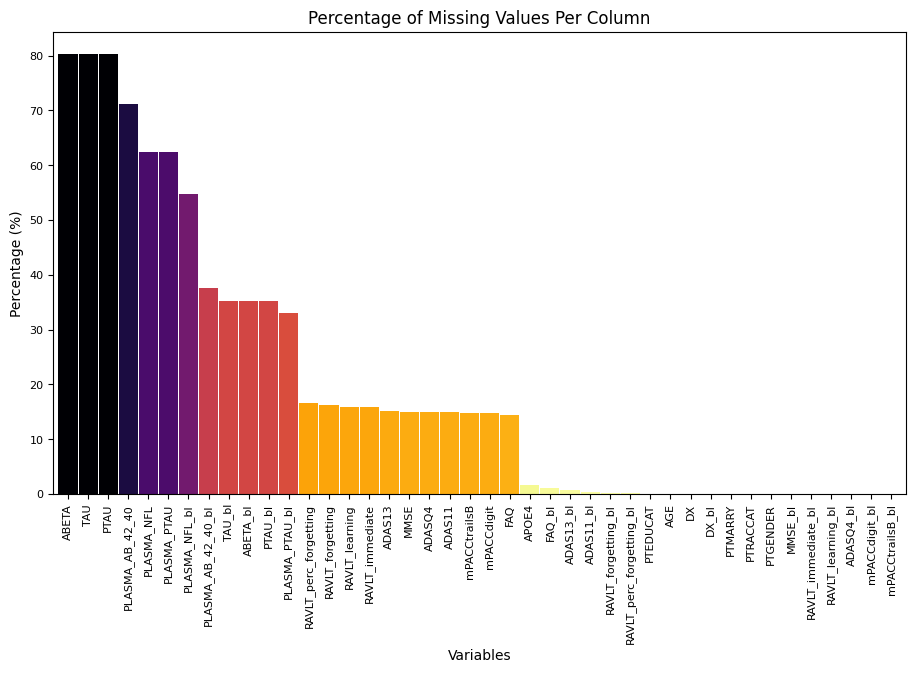

In [25]:
null_count_percent = (
    merged_df.isnull().sum().sort_values(ascending=False) / merged_df.shape[0]
) * 100
norm = plt.Normalize(null_count_percent.min(), null_count_percent.max())
cmap = plt.cm.inferno_r
scalable_mapper = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
scalable_mapper.set_array([])

fig, ax = plt.subplots(figsize=(11, 6))
null_count_percent.plot(
    kind="bar",
    color=(cmap(norm(null_count_percent.values))),
    width=0.95,
    fontsize=8,
    xlabel="Variables",
    ylabel="Percentage (%)",
)
plt.title("Percentage of Missing Values Per Column")
plt.show()

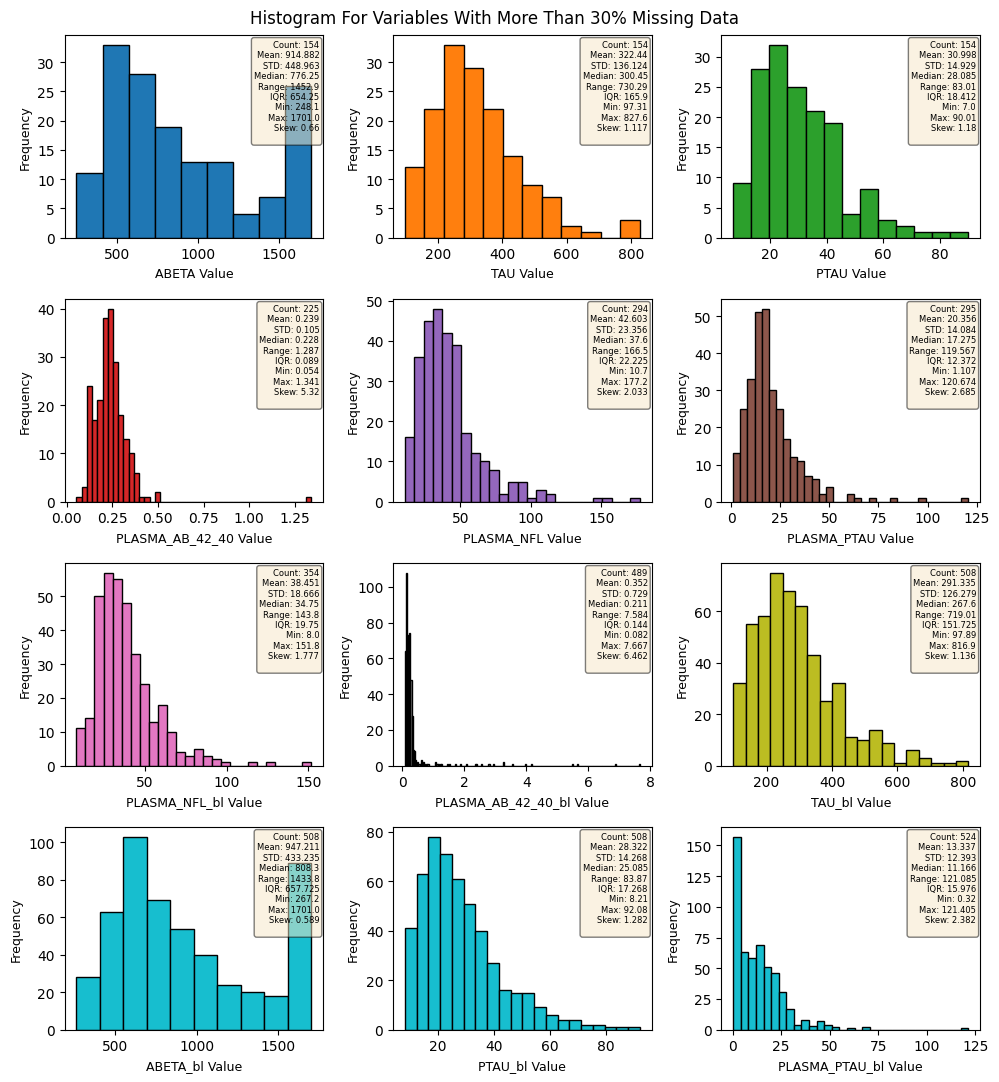

In [26]:
# Find the names of the columns that have more than 30% of the data missing
missing_more_than = 30
column_names = null_count_percent[null_count_percent > missing_more_than].index

# Create a new df of those specific columns
missing_data_df = merged_df[column_names]


# Plot the histograms for all those columns and the
# numerical statistics calculated above visually
cols_histogram_of_df(
    missing_data_df,
    f"Histogram For Variables With More Than {missing_more_than}% Missing Data",
)

In [27]:
# Convert numerical values that are objects into float64 to be able to apply imputation
for col in merged_df.select_dtypes(include=["object"]).columns:
    merged_df[col] = pd.to_numeric(merged_df[col])

In [28]:
# Setup a seed for reproducible results
SEED = 42
np.random.seed(SEED)

# Create a sample of the df with only those rows with no NaN values
sample_data = merged_df.dropna().sample(frac=0.8, random_state=SEED)

# Replace around 20% of the data in the df with NaN values
sample_nan = sample_data.mask(np.random.rand(*sample_data.shape) < 0.2)
sample_nan

,DX_bl,DX,AGE,PTGENDER,PTEDUCAT,PTMARRY,PTRACCAT,APOE4,ABETA_bl,ABETA,TAU_bl,TAU,PTAU_bl,PTAU,PLASMA_NFL_bl,PLASMA_NFL,PLASMA_PTAU_bl,PLASMA_PTAU,PLASMA_AB_42_40_bl,PLASMA_AB_42_40,MMSE_bl,MMSE,RAVLT_immediate_bl,RAVLT_immediate,RAVLT_learning_bl,RAVLT_learning,RAVLT_forgetting_bl,RAVLT_forgetting,RAVLT_perc_forgetting_bl,RAVLT_perc_forgetting,ADAS11_bl,ADAS11,ADAS13_bl,ADAS13,ADASQ4_bl,ADASQ4,mPACCdigit_bl,mPACCdigit,mPACCtrailsB_bl,mPACCtrailsB,FAQ_bl,FAQ
714,1.0,1,77.4,0.0,NaN,NaN,NaN,1.0,709.2,723.9,NaN,424.3,40.95,43.48,NaN,NaN,28.406,23.333,0.693795,0.108203,27.0,NaN,26.0,25.0,2.0,4.0,NaN,6.0,100.0000,NaN,8.0,NaN,NaN,20.0,5.0,7.0,-5.77534,NaN,-4.994140,-6.887500,NaN,15.0
435,NaN,0,65.4,1.0,16.0,1.0,0.0,NaN,1533.0,1200.0,183.3,187.1,16.17,17.20,NaN,NaN,NaN,1.107,0.131152,0.128117,30.0,26.0,34.0,44.0,NaN,-1.0,NaN,3.0,77.7778,NaN,NaN,6.0,16.0,13.0,7.0,NaN,-4.56871,NaN,-3.164570,-4.689420,1.0,NaN
260,1.0,0,55.5,1.0,19.0,1.0,NaN,1.0,1195.0,1044.0,194.0,198.6,16.84,17.12,NaN,NaN,NaN,11.363,0.128360,0.129896,30.0,30.0,52.0,52.0,7.0,NaN,5.0,NaN,38.4615,42.8571,2.0,2.0,3.0,NaN,1.0,1.0,1.08601,1.08601,0.686840,NaN,0.0,0.0
434,0.0,0,NaN,0.0,18.0,0.0,NaN,0.0,1701.0,1701.0,312.9,310.6,27.57,27.20,33.0,28.3,12.606,25.367,0.131124,NaN,29.0,27.0,NaN,29.0,4.0,3.0,NaN,6.0,85.7143,85.7143,9.0,16.0,16.0,22.0,7.0,6.0,-6.93199,-7.31754,NaN,-5.732790,0.0,NaN
363,NaN,0,74.6,NaN,18.0,0.0,0.0,NaN,1052.0,892.6,139.4,NaN,10.88,NaN,38.5,42.2,22.684,27.149,0.141194,0.134896,28.0,30.0,NaN,27.0,4.0,1.0,6.0,5.0,75.0000,83.3333,7.0,4.0,15.0,NaN,NaN,4.0,-4.55443,NaN,NaN,-0.521352,NaN,NaN
304,1.0,0,74.0,0.0,20.0,0.0,0.0,0.0,1701.0,1701.0,245.0,269.8,NaN,21.42,39.4,35.9,21.781,18.208,0.133759,0.132874,29.0,29.0,45.0,33.0,NaN,5.0,4.0,NaN,30.7692,NaN,6.0,8.0,9.0,15.0,NaN,7.0,-1.96269,-7.73165,-0.744576,-5.071300,4.0,2.0
291,1.0,0,NaN,1.0,18.0,0.0,0.0,NaN,1167.0,681.7,NaN,144.6,15.51,11.88,37.7,60.6,15.317,26.102,0.124506,0.121417,27.0,29.0,33.0,29.0,7.0,4.0,10.0,8.0,100.0000,100.0000,9.0,NaN,14.0,NaN,5.0,5.0,-5.77534,-1.44861,NaN,NaN,0.0,0.0
763,NaN,1,77.8,0.0,16.0,NaN,NaN,1.0,883.9,690.7,326.9,289.6,33.02,28.79,50.4,53.9,20.035,NaN,NaN,0.107563,27.0,23.0,37.0,NaN,NaN,1.0,7.0,7.0,87.5000,87.5000,11.0,12.0,17.0,17.0,6.0,5.0,-8.91686,-14.02900,NaN,NaN,NaN,NaN
362,0.0,0,80.6,NaN,16.0,0.0,NaN,0.0,633.0,499.1,166.1,NaN,14.10,12.37,36.5,42.9,8.791,NaN,NaN,0.123352,NaN,26.0,36.0,30.0,5.0,3.0,8.0,7.0,80.0000,100.0000,11.0,9.0,NaN,NaN,NaN,NaN,NaN,-7.33896,NaN,-7.232960,0.0,NaN
415,1.0,0,NaN,1.0,17.0,1.0,0.0,0.0,1701.0,NaN,281.5,302.3,22.73,24.47,34.6,38.4,19.127,15.304,0.132810,0.128505,28.0,27.0,NaN,16.0,3.0,4.0,5.0,3.0,71.4286,NaN,10.0,NaN,16.0,15.0,5.0,8.0,-3.81189,-8.40278,-4.075630,-7.480430,0.0,0.0


In [29]:
# Compute the mse and mae for each K-value from
# K=1 to K=10 to see the imputation performance
knn_results = {}
for n in range(1, 11):
    knn_sample_imputed = data_imputation(sample_nan, Knn(n))
    mse, mae = compute_mse_and_mae(sample_data, knn_sample_imputed)
    knn_results[n] = {"DF": knn_sample_imputed, "MSE": float(mse), "MAE": float(mae)}

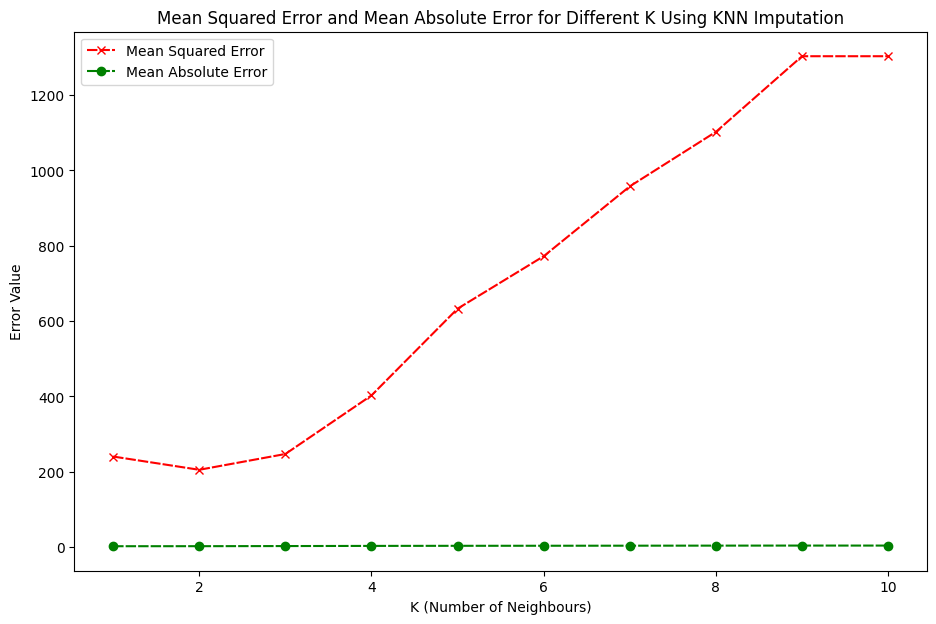

In [30]:
# Plot the MAE and MSE results from the imputation on a plot for each K
plt.figure(figsize=(11, 7))
plt.plot(
    knn_results.keys(),
    [v["MSE"] for v in knn_results.values()],
    color="red",
    label="Mean Squared Error",
    linestyle=(0, (5, 1)),
    marker="x",
)
plt.plot(
    knn_results.keys(),
    [v["MAE"] for v in knn_results.values()],
    color="green",
    label="Mean Absolute Error",
    linestyle=(0, (5, 1)),
    marker="o",
)
plt.xlabel("K (Number of Neighbours)")
plt.ylabel("Error Value")
plt.title(
    "Mean Squared Error and Mean Absolute Error for Different K Using KNN Imputation"
)
plt.legend()
plt.show()

In [ ]:
knn_res = knn_results[2]
print("2-NN Imputation Performance Results:")
print(f"Mean Squared Error:\t{knn_res['MSE']}\nMean Absolute Error:\t{knn_res['MAE']}")

2-NN Imputation Performance Results:
Mean Squared Error: 205.18884501548646
Mean Absolute Error: 2.34106945674612


In [32]:
# Compute the mse and mae for MICE forest data imputation on the
# sample dataset for iterations from 3 to 5 and 3 to 10 datasets
# for each iteration to find the optimal parameters for imputation
mice_forest_results = {}
for i in range(3, 6):
    mice_forest_results[i] = {}
    for k in range(3, 11):
        mice_forest_sample_imputed = data_imputation(
            sample_nan.reset_index(drop=True), Mice_forest(iterations=i, num_datasets=k)
        )
        mse, mae = compute_mse_and_mae(sample_data, mice_forest_sample_imputed)
        mice_forest_results[i][k] = {
            "DF": mice_forest_results,
            "MSE": float(mse),
            "MAE": float(mae),
        }

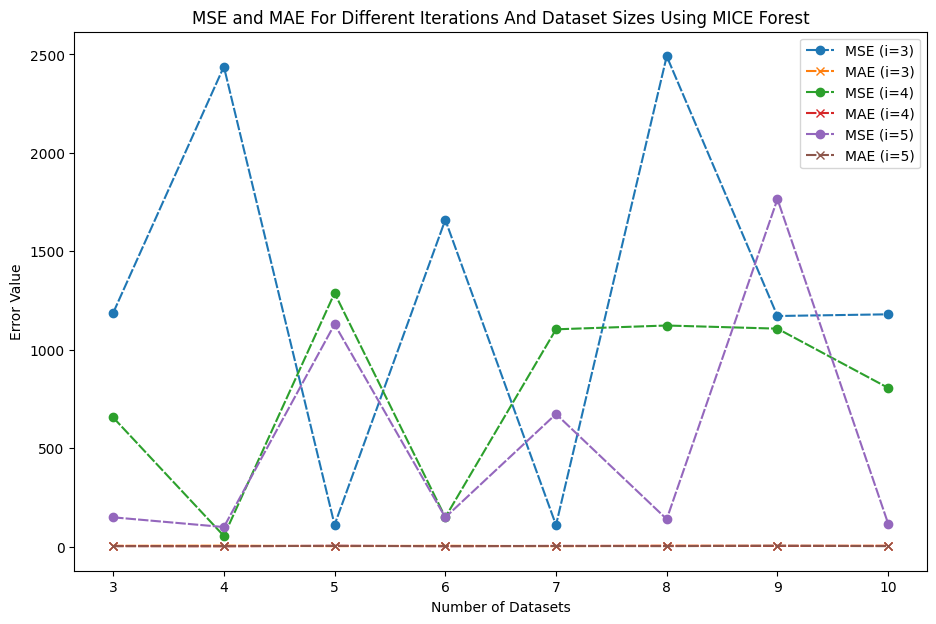

In [33]:
# Plot the MAE and MSE results from the imputation for each iteration and dataset size
plt.figure(figsize=(11, 7))
for i in range(3, 6):
    plt.plot(
        range(3, 11),
        [mice_forest_results[i][k]["MSE"] for k in range(3, 11)],
        label=f"MSE (i={i})",
        marker="o",
        linestyle=(0, (5, 1)),
    )
    plt.plot(
        range(3, 11),
        [mice_forest_results[i][k]["MAE"] for k in range(3, 11)],
        label=f"MAE (i={i})",
        marker="x",
        linestyle=(0, (5, 1)),
    )
plt.title("MSE and MAE For Different Iterations And Dataset Sizes Using MICE Forest")
plt.xlabel("Number of Datasets")
plt.ylabel("Error Value")
plt.legend()
plt.show()

In [ ]:
mice_res = mice_forest_results[4][4]
print("4 Iterations & 4 Datasets MICE Forest Imputation Performance Results:")
print(
    f"Mean Squared Error:\t{mice_res['MSE']}\nMean Absolute Error:\t{mice_res['MAE']}"
)

4 Iterations & 4 Datasets MICE Forest Imputation Performance Results:
Mean Squared Error: 54.013303000169884
Mean Absolute Error: 1.8118241137604056


In [ ]:
# Use MICE forest to impute the whole dataset
mice_forest_df_imputed = data_imputation(
    merged_df, Mice_forest(iterations=4, num_datasets=4)
)
mice_forest_df_imputed

In [ ]:
# Function that takes a list of column names and appends
# to that list the matching baseline column name
add_bl_version_to_lst = lambda x: x + [f"{y}_bl" for y in x]
csf_cols = add_bl_version_to_lst(["ABETA", "PTAU", "TAU"])
plasma_cols = add_bl_version_to_lst(["PLASMA_AB_42_40", "PLASMA_NFL", "PLASMA_PTAU"])

print(f"Plasma Columns:\t{plasma_cols}")
print(f"CSF Columns:\t{csf_cols}")

Plasma Columns:	['PLASMA_AB_42_40', 'PLASMA_NFL', 'PLASMA_PTAU', 'PLASMA_AB_42_40_bl', 'PLASMA_NFL_bl', 'PLASMA_PTAU_bl']
CSF Columns:	['ABETA', 'PTAU', 'TAU', 'ABETA_bl', 'PTAU_bl', 'TAU_bl']


In [ ]:
datasets = [
    # Remove the CSF and plasma data from the imputed df
    (mice_forest_df_imputed.drop(columns=(csf_cols + plasma_cols)), ""),
    # Remove the plasma data from the imputed df
    ((mice_forest_df_imputed.drop(columns=plasma_cols), "WITH_CSF_")),
    # Remove the CSF data from the imputed df
    ((mice_forest_df_imputed.drop(columns=csf_cols), "WITH_PLASMA_")),
]

# Export each of these datasets
for df, name in datasets:
    df.to_csv(
        f"{OUTPUT_DIR}/BASE_{name}DATASET_CLEANED.csv", encoding="utf-8", index=False
    )

# Export the final imputed CSV
mice_forest_df_imputed.to_csv(
    f"{OUTPUT_DIR}/FULL_DATASET_CLEANED.csv", encoding="utf-8", index=False
)